# **Ejercicio 1**
Tome el siguiente conjunto de datos de los créditos que unas personas han solicitado a un banco, la columna `cumplio` nos da información de si el solicitante pagó o no el crédito. Entrene un modelo de `KNN` para predecir la solicitud de nuevos clientes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
clientes = pd.read_csv("creditos.csv")
clientes.head()

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0


In [3]:
buenos = clientes[clientes['cumplio']==1]
malos = clientes[clientes['cumplio']==0]

In [4]:
buenos.head()

,edad,credito,cumplio
1,19,477965,1
6,23,583565,1
7,24,100000,1
8,24,199272,1
13,25,195341,1


In [5]:
malos.head()

,edad,credito,cumplio
0,18,363112,0
2,20,239072,0
3,22,195265,0
4,22,482174,0
5,23,468815,0


Grafiquemos los **pagadores vs los deudores**

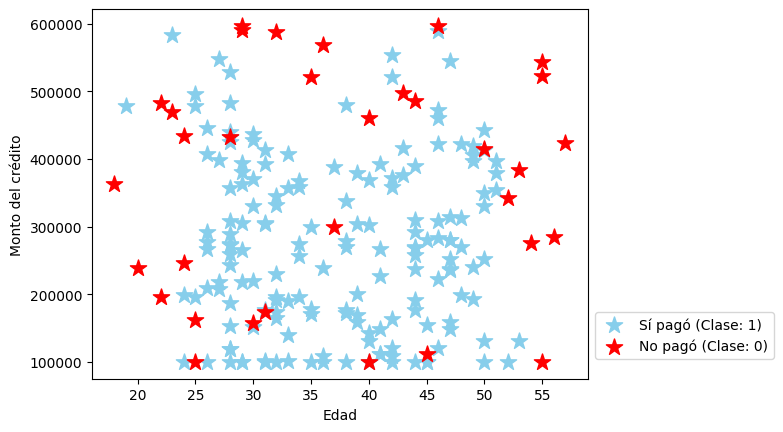

In [6]:
plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue",
            label="Sí pagó (Clase: 1)")

plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red",
            label="No pagó (Clase: 0)")

plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

Podemos ver unas regiones que claramente son de no pagadores a simple vista, por ejemplo personas menores a unos 25 años y mayores a 55 años. También vemos que presonas que solicitan créditos grandes tampoco pagan. La región media parece ser una buena región de dinero y edad donde los clientes sí pagan

**Preparación de los datos**

In [7]:
features = clientes[["edad", "credito"]]
clase = clientes["cumplio"]

x_train, x_test, y_train, y_test = train_test_split(features, clase, test_size = 0.2, random_state = 9)


In [8]:
pd.concat([x_train, y_train], axis = 1).head()

,edad,credito,cumplio
146,44,486320,0
169,47,544233,1
145,44,389438,1
55,30,152192,1
21,26,407631,1


In [9]:
pd.concat([x_test, y_test], axis = 1).head()

,edad,credito,cumplio
84,34,196285,1
60,30,428457,1
54,29,595997,0
109,39,200101,1
156,46,422824,1


In [10]:
# KNN lo podemos interpretar con probabilidades, usemos MinMaxScaler
escalador = preprocessing.MinMaxScaler()

datos_train = escalador.fit_transform(x_train)
datos_test = escalador.transform(x_test)

In [16]:
clasificador = KNeighborsClassifier(n_neighbors=3)

clasificador.fit(datos_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
y_pred = clasificador.predict(datos_test)

In [18]:
pd.DataFrame({'y_test':y_test, 'predicciones': y_pred})

,y_test,predicciones
84,1,1
60,1,1
54,0,0
109,1,1
156,1,1
140,1,1
39,1,1
116,1,1
123,1,1
53,0,0


Vemos una buena cantidad de predicciones a simple vista, pasemos un nuevo solicitante

Clase: [0]
Probabilidades por clase [[0.66666667 0.33333333]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


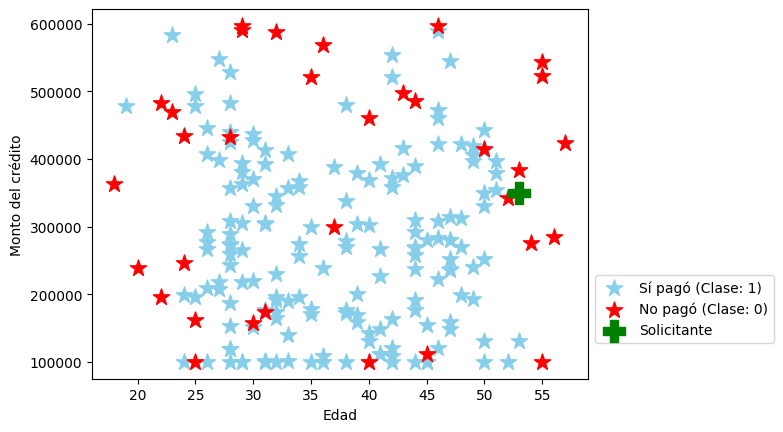

In [19]:
edad = 53
monto = 350000

#Escalar los datos del nuevo solicitante
solicitante = escalador.transform([[edad, monto]])

#Calcular clase y probabilidades
print("Clase:", clasificador.predict(solicitante))
print("Probabilidades por clase",
      clasificador.predict_proba(solicitante))

#Código para graficar
plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue", label="Sí pagó (Clase: 1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red", label="No pagó (Clase: 0)")
plt.scatter(edad, monto, marker="P", s=250, color="green", label="Solicitante")
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

Como vemos esta nueva persona no parece ser un buen pagador, ya que dos de los 3 vecinos no son buenos pagadores

### Regiones de los pagadores y los deudores

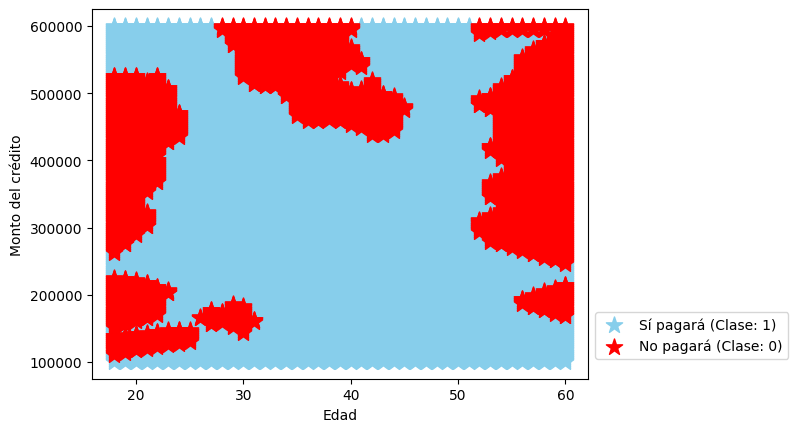

In [20]:
# Creemos muchos datos de créditos en el intervalo 100000 y 600010
creditos = np.array([np.arange(100000, 600010, 1000)]*43).reshape(1, -1)
# Creemos muchos datos de edades entre 18 y 61
edades = np.array([np.arange(18, 61)]*501).reshape(1, -1)
todos = pd.DataFrame(np.stack((edades, creditos), axis=2)[0],
                     columns=["edad", "credito"])

#Escalar los datos
solicitantes = escalador.transform(todos)

#Predecir todas las clases
clases_resultantes = clasificador.predict(solicitantes)

#Código para graficar
buenos = todos[clases_resultantes==1]
malos = todos[clases_resultantes==0]
plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue", label="Sí pagará (Clase: 1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red", label="No pagará (Clase: 0)")
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

Tenemos ahora las regiones rojas que son las de los no pagadores y la región azul para los pagadores

### Explicación de la generación de los datos

In [21]:
creditos

array([[100000, 101000, 102000, ..., 598000, 599000, 600000]])

In [22]:
edades

array([[18, 19, 20, ..., 58, 59, 60]])

In [23]:
# np.stack apila los array a lo largo del tercer eje, axis = 2
apilado = np.stack((edades, creditos), axis=2)
apilado

array([[[    18, 100000],
        [    19, 101000],
        [    20, 102000],
        ...,
        [    58, 598000],
        [    59, 599000],
        [    60, 600000]]])

In [24]:
apilado[0][0][0]

18

In [25]:
# Reducimos la dimensión del array
apilado2 = np.stack((edades, creditos), axis=2)[0]
apilado2

array([[    18, 100000],
       [    19, 101000],
       [    20, 102000],
       ...,
       [    58, 598000],
       [    59, 599000],
       [    60, 600000]])

In [26]:
apilado2[0][0]

18

### Evaluemos el modelo usando algunas métricas de desempeño

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión (Accuracy): {accuracy:.2f}')

# Calcular la precisión (precision)
precision = precision_score(y_test, y_pred)
print(f'Precisión (Precision): {precision:.2f}')

# Calcular el recuerdo (recall)
recall = recall_score(y_test, y_pred)
print(f'Recuerdo (Recall): {recall:.2f}')

# Calcular la puntuación F1 (F1 score)
f1 = f1_score(y_test, y_pred)
print(f'Puntuación F1 (F1 Score): {f1:.2f}')

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(confusion)


Precisión (Accuracy): 0.97
Precisión (Precision): 0.97
Recuerdo (Recall): 1.00
Puntuación F1 (F1 Score): 0.99
Matriz de Confusión:
[[ 6  1]
 [ 0 33]]
